# Applying PCA to MNIST Digit Images

The PCA algorithm we will be using is the same one as the Eigenface notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('mnist_train.csv', delimiter=',')

In [3]:
dim = 28
labels = data[:,0]
images = data[:,1:]

def getnumdata(label):
    numind = np.where(labels == label)
    numdata = images[numind]
    return(numdata)

eightdata = getnumdata(8)
numeight = len(eightdata[:, 0])
numtotal = len(images[:, 0])

In [4]:
# calculates average row
def avg(array):
    return(np.sum(array, axis=0) / len(array[:, 0]))

In [5]:
def compress(dataset, avgset, dim):
    datalen = len(dataset[:,0])
    avg_data = avg(avgset)
    dataset = dataset.T
    
    A = np.zeros((dim * dim, datalen), dtype=np.int16)
    for i in np.arange(datalen):
        A[:, i] = dataset[:, i].astype(np.int16) - avg_data.astype(np.int16)
        A[:, i][A[:, i] < 0] = 0
    A.astype(np.uint8)
    
    # covariance matrix
    S = np.matmul(A.T.astype(float), A.astype(float))
    # D is eigenvalues, V is eigenvectors
    D, V = np.linalg.eig(S)
    # sort D, and then sort V the same way to get the eigenvectors in descending order
    order = D.argsort()[::-1]
    V = V[:, order]

    # normalize U for output
    U = np.matmul(A.astype(float), V)
    U = np.real(U)
    squares = np.square(U)
    denom = np.sqrt(np.sum(squares, axis=0))
    for i in np.arange(datalen):
        U[:, i] = U[:, i] / denom[i]
    return([avg_data, U, dim])
        
def reconst(results, data, try_reconst, n_eig):
    data = data.T
    omegas = np.matmul(results[1][:, 1:n_eig].T, (data[:, try_reconst].astype(float)) - results[0])
    res = np.matmul(results[1][:, 1:n_eig], omegas) + results[0].astype(float)

    fig, axes = plt.subplots(1,2)
    axes[0].imshow(np.reshape(data[:, try_reconst], (results[2], -1)), cmap='gray')
    axes[1].imshow(np.reshape(res, (results[2], -1)), cmap='gray')

In [6]:
var = compress(getnumdata(8), images, 28)

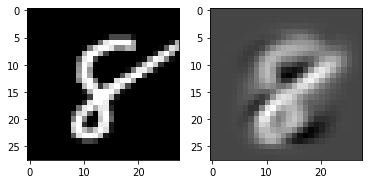

In [7]:
reconst(var, getnumdata(8), 50, 10)

This is a compression using the average of all the images for digits 0-9. We can compare this to using the average of just the digits 8.

In [8]:
var2 = compress(getnumdata(8), getnumdata(8), 28)

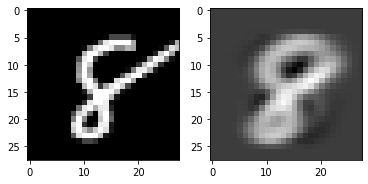

In [9]:
reconst(var2, getnumdata(8), 50, 10)

The compressions are pretty similar, surprisingly. We can see why if we take a look at the two averages.

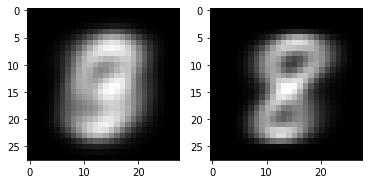

In [10]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(avg(images), (28, -1)), cmap='gray')
axes[1].imshow(np.reshape(avg(getnumdata(8)), (28, -1)), cmap='gray')

It seems the average for all the images actually resembles an 8, which makes sense as the number 8 shares contours with most of the other numbers. Perhaps compressing a different digit, like the digit 2, would be more interesting.

In [11]:
var3 = compress(getnumdata(2), images, 28)

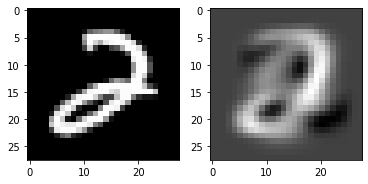

In [12]:
reconst(var3, getnumdata(2), 50, 10)

In [13]:
var4 = compress(getnumdata(2), getnumdata(2), 28)

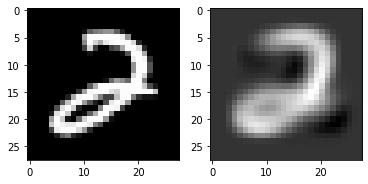

In [14]:
reconst(var4, getnumdata(2), 50, 10)

It turns out the digit 8 might have been an exception, as PCA using the average of all images does not compress as well for 2 as it does when using the average of just 2s. 